In [5]:
import sys
sys.path.append("../")
import caten as C

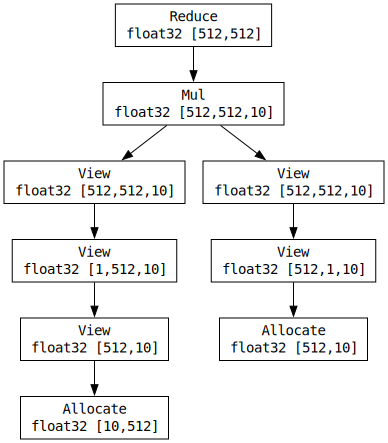

In [7]:
(C.Tensor([512, 10]) @ C.Tensor([10, 512])).dot()